Author : Anıl Kerem Yuvanç
ID : 201101049
Course : YAP470

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## Exploratory Data Analysis (EDA)

In [2]:
data = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")

In [3]:
data.head

<bound method NDFrame.head of      Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]>

In [4]:
data = data.drop("Gender", axis=1)

In [5]:
data.head()

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3


In [6]:
eksik_veri_sayisi = data.isnull().sum()
print(eksik_veri_sayisi)


Height    0
Weight    0
Index     0
dtype: int64


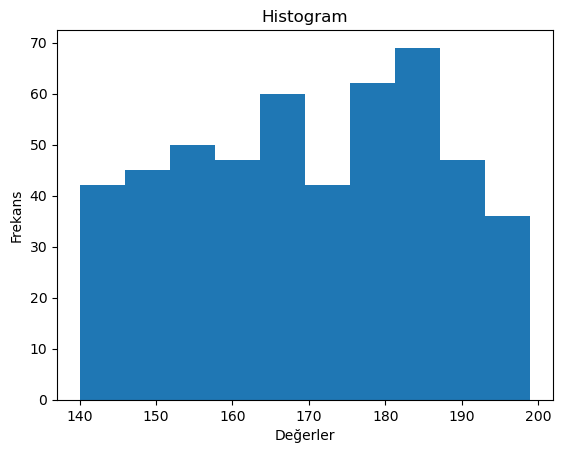

In [7]:
plt.hist(data["Height"], bins=10)
plt.xlabel("Değerler")
plt.ylabel("Frekans")
plt.title("Histogram")
plt.show()

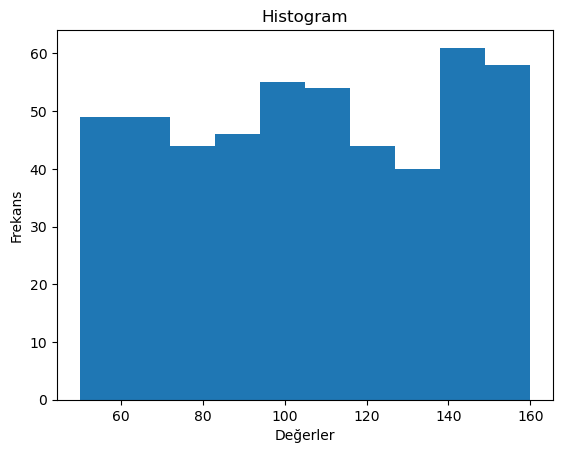

In [8]:
plt.hist(data["Weight"], bins=10)
plt.xlabel("Değerler")
plt.ylabel("Frekans")
plt.title("Histogram")
plt.show()

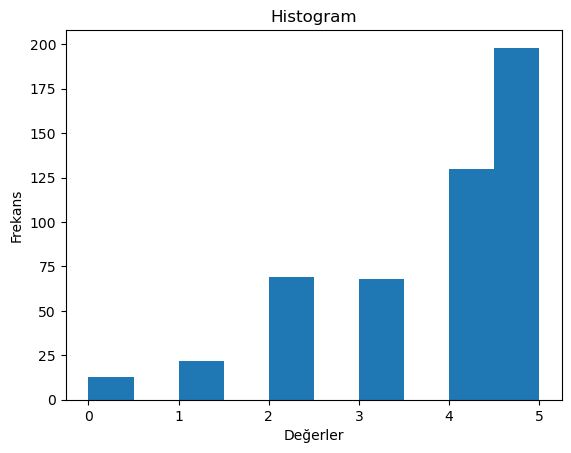

In [9]:
plt.hist(data["Index"], bins=10)
plt.xlabel("Değerler")
plt.ylabel("Frekans")
plt.title("Histogram")
plt.show()

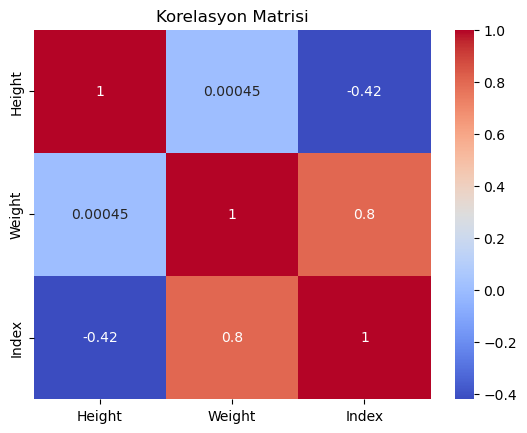

In [10]:
korelasyon_matrisi = data.corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

#### Bu korelasyon matriksinin sonucuna göre Height ve Weight özelliklerinin arasında bir ilişki olmadığı gözüküyor.

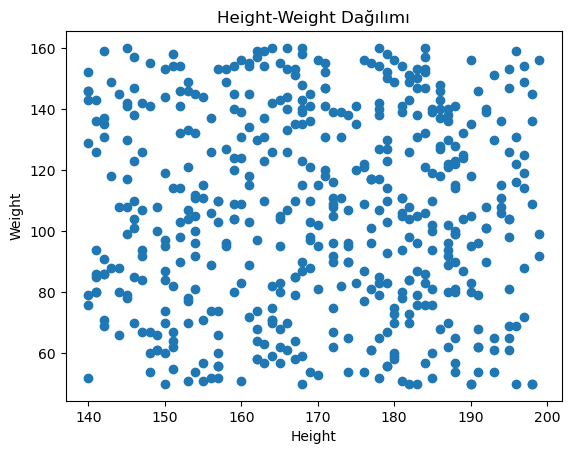

In [11]:
Height = data["Height"]
Weight = data["Weight"]

# Scatter plot
plt.scatter(Height, Weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height-Weight Dağılımı")
plt.show()

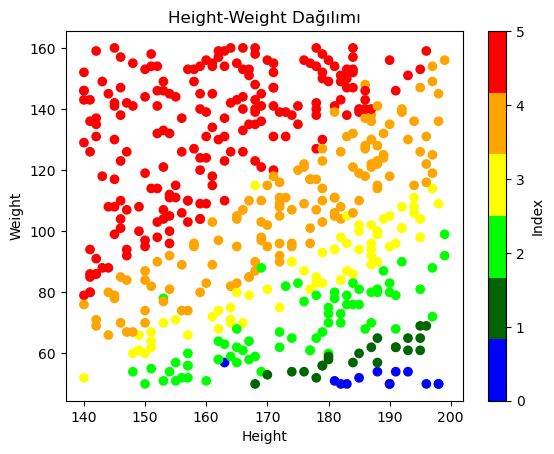

In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Boy, kilo ve index verileri
boy = data["Height"]
kilo = data["Weight"]
index = data.Index

# Renklerin belirlenmesi
renkler = ["blue",'darkgreen', 'lime', 'yellow', 'orange', 'red']
renk_haritasi = mcolors.ListedColormap(renkler)

# Scatter plot
plt.scatter(boy, kilo, c=index, cmap=renk_haritasi)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height-Weight Dağılımı")
plt.colorbar(label="Index")
plt.show()

# Linear Regression

In [13]:
from LR import LinearRegression

In [14]:
model = LinearRegression()
X=[]
Y=[]
Z=[]
listOfData = data.values.tolist()

for d in listOfData:
    X.append(d[0])
    Y.append(d[1])
    Z.append(d[2])
    
X_train = X[250:]
X_test = X[:250]
Y_train = Y[250:]
Y_test = Y[:250]
Z_train = Z[250:]
Z_test = Z[:250]

model.fit(X_train, Y_train, Z_train)
test_prediction = model.predict(X_test, Y_test)
train_prediction = model.predict(X_train,Y_train)

# Metriklerin Hesaplanması

In [15]:
testAccuracy = metrics.r2_score(Z_test, test_prediction)
trainAccuracy = metrics.r2_score(Z_train, train_prediction)
print("Train R2 = {} \n Test R2 = {}"
      .format(trainAccuracy,testAccuracy))

Train R2 = 0.6927161200931025 
 Test R2 = 0.6132580827578364


In [16]:
from sklearn.metrics import mean_absolute_error
testAccuracy = mean_absolute_error(Z_test, test_prediction)
trainAccuracy = mean_absolute_error(Z_train, train_prediction)
print("Train Mean Absolute Error = {} \n Test Mean Absolute Error = {}"
      .format(trainAccuracy,testAccuracy))

Train Mean Absolute Error = 0.5915226014069993 
 Test Mean Absolute Error = 0.6696420174134498


In [17]:
testAccuracy = metrics.mean_squared_error(Z_test, test_prediction)
trainAccuracy = metrics.mean_squared_error(Z_train, train_prediction)
print("Train Mean Squared Error = {} \n Test Mean Squared Error = {}"
      .format(trainAccuracy,testAccuracy))

Train Mean Squared Error = 0.5844588561249977 
 Test Mean Squared Error = 0.6815073247581267


### Sonuçlar

Hatalar R2, MSE, MAE için ayrı ayrı hesaplandı.Eğitim kümesindeki düşük MSE değeri, modelin eğitim verilerine iyi uyum sağladığı ve bu veriler üzerinde düşük hata yaptığı anlamına gelir. Ancak, test kümesindeki MSE değeri daha yüksek olması, modelin eğitim verilerine aşırı uyum sağlayabileceği ve yeni veriler üzerinde daha yüksek hatalar yapabileceği anlamına gelir. Bizim sonuçlarımızda test başarısının train başarısından biraz daha fazla olduğu gözüküyor bu yüzden modelimiz overfit etmiş olabilir.

Bu durumu önlemek için modelimizi regularization teknikleri ile dengelemek veya daha fazla veri toplamak gibi adımlar atabiliriz. Daha fazla veri, modelin genelleştirme yeteneğini artırabilir ve overfitting'i azaltabilir.